In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV, train_test_split, RandomizedSearchCV
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
import tkinter as tk
from tkinter import ttk

In [2]:
data = pd.read_csv('500_Person_Gender_Height_Weight_Index.csv')
data.describe()


,Height,Weight,Index
count,500.000000,500.000000,500.000000
mean,169.944000,106.000000,3.748000
std,16.375261,32.382607,1.355053
min,140.000000,50.000000,0.000000
25%,156.000000,80.000000,3.000000
50%,170.500000,106.000000,4.000000
75%,184.000000,136.000000,5.000000
max,199.000000,160.000000,5.000000


In [3]:
data.head()

,Gender,Height,Weight,Index
0,Male,174,96,4
1,Male,189,87,2
2,Female,185,110,4
3,Female,195,104,3
4,Male,149,61,3


In [4]:
def give_names_to_indices(ind):
    if ind==0:
        return 'Extremely Weak'
    elif ind==1:
        return 'Weak'
    elif ind==2:
        return 'Normal'
    elif ind==3:
        return 'OverWeight'
    elif ind==4:
        return 'Obesity'
    elif ind==5:
        return 'Extremely Obese'

In [5]:
data['Index'] = data['Index'].apply(give_names_to_indices)
pd.DataFrame(data)

,Gender,Height,Weight,Index
0,Male,174,96,Obesity
1,Male,189,87,Normal
2,Female,185,110,Obesity
3,Female,195,104,OverWeight
4,Male,149,61,OverWeight
...,...,...,...,...
495,Female,150,153,Extremely Obese
496,Female,184,121,Obesity
497,Female,141,136,Extremely Obese
498,Male,150,95,Extremely Obese


<function matplotlib.pyplot.show(close=None, block=None)>

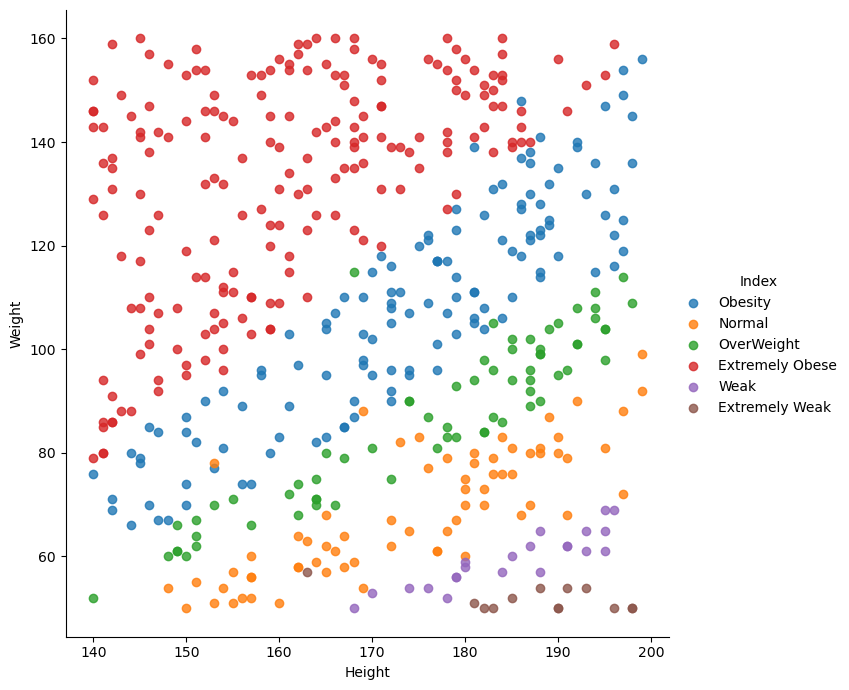

In [6]:
sns.lmplot(x='Height',y='Weight',data=data,hue='Index',height=7,aspect=1,fit_reg=False)
plt.show

In [7]:
people = data['Gender'].value_counts()
pd.DataFrame(people)


,count
Gender,
Female,255
Male,245


In [8]:
categories = data['Index'].value_counts()
pd.DataFrame(categories)

,count
Index,
Extremely Obese,198
Obesity,130
Normal,69
OverWeight,68
Weak,22
Extremely Weak,13


In [9]:

data[data['Gender']=='Male']['Index'].value_counts()


Index
Extremely Obese    105
Obesity             59
OverWeight          32
Normal              28
Weak                15
Extremely Weak       6
Name: count, dtype: int64

In [10]:


data[data['Gender']=='Female']['Index'].value_counts()


Index
Extremely Obese    93
Obesity            71
Normal             41
OverWeight         36
Weak                7
Extremely Weak      7
Name: count, dtype: int64

In [11]:
data2 = pd.get_dummies(data['Gender'])
data.drop('Gender',axis=1,inplace=True)
data = pd.concat([data,data2],axis=1)
data.head()


,Height,Weight,Index,Female,Male
0,174,96,Obesity,False,True
1,189,87,Normal,False,True
2,185,110,Obesity,True,False
3,195,104,OverWeight,True,False
4,149,61,OverWeight,False,True


In [12]:
y=data['Index']
data =data.drop(['Index'],axis=1)
data.head()


,Height,Weight,Female,Male
0,174,96,False,True
1,189,87,False,True
2,185,110,True,False
3,195,104,True,False
4,149,61,False,True


In [13]:
scaler = StandardScaler()
data = scaler.fit_transform(data)
data=pd.DataFrame(data)
data

,0,1,2,3
0,0.247939,-0.309117,-1.020204,1.020204
1,1.164872,-0.587322,-1.020204,1.020204
2,0.920357,0.123647,0.980196,-0.980196
3,1.531645,-0.061823,0.980196,-0.980196
4,-1.280283,-1.391027,-1.020204,1.020204
...,...,...,...,...
495,-1.219155,1.452850,0.980196,-0.980196
496,0.859228,0.463676,0.980196,-0.980196
497,-1.769315,0.927351,0.980196,-0.980196
498,-1.219155,-0.340029,-1.020204,1.020204


In [33]:
rf_model = RandomForestClassifier(random_state=101)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(data, y, test_size=0.3, random_state=101)

In [57]:
random_grid = {
    'n_estimators':[int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)],
    'max_features':['sqrt'],
    'max_depth': [int(x) for x in np.linspace(10, 110, num = 11)],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
    }

random_cv = RandomizedSearchCV(estimator = rf_model, param_distributions = random_grid, verbose = 2, cv = 3, n_iter = 100, n_jobs = -1, random_state = 101)
random_cv.fit(X_train,y_train)
print(random_cv.best_params_)

Fitting 3 folds for each of 100 candidates, totalling 300 fits
{'n_estimators': 1000, 'min_samples_split': 5, 'min_samples_leaf': 2, 'max_features': 'sqrt', 'max_depth': 90, 'bootstrap': False}


In [58]:
pred = random_cv.predict(X_test)
pd.DataFrame(pred)

,0
0,Extremely Obese
1,Extremely Obese
2,Obesity
3,OverWeight
4,OverWeight
...,...
145,Extremely Obese
146,Normal
147,Obesity
148,Extremely Obese


In [59]:
print("Model Evaluation:")
print(f"Train Accuracy is --> {random_cv.score(X_train,y_train)}")
print(f"Test Accuracy is --> {random_cv.score(X_test,y_test)}")

Model Evaluation:
Train Accuracy is --> 0.9914285714285714
Test Accuracy is --> 0.8733333333333333


In [60]:
param_grid = {
    'bootstrap': [True],
    'max_depth': [40, 50, 60, 70],
    'max_features': [2, 3],
    'min_samples_leaf': [3, 4, 5],
    'min_samples_split': [2, 4, 6],
    'n_estimators': [400, 600, 800, 1000]
}

grid_cv = GridSearchCV(estimator = rf_model, param_grid = param_grid, cv = 3, n_jobs = -1, verbose = 2)
grid_cv.fit(X_train,y_train)
print(grid_cv.best_params_)

Fitting 3 folds for each of 144 candidates, totalling 432 fits
{'bootstrap': True, 'max_depth': 40, 'max_features': 'sqrt', 'min_samples_leaf': 3, 'min_samples_split': 2, 'n_estimators': 400}


In [61]:
pred = grid_cv.predict(X_test)
pd.DataFrame(pred)

,0
0,Extremely Obese
1,Extremely Obese
2,Obesity
3,OverWeight
4,Normal
...,...
145,Extremely Obese
146,Normal
147,Obesity
148,Extremely Obese


In [62]:
print("Model Evaluation:")
print(f"Train Accuracy is --> {grid_cv.score(X_train,y_train)}")
print(f"Test Accuracy is --> {grid_cv.score(X_test,y_test)}")

Model Evaluation:
Train Accuracy is --> 0.9714285714285714
Test Accuracy is --> 0.8466666666666667


In [47]:
print("Metrics:")
print(classification_report(y_test,pred))
print('\n')
print(confusion_matrix(y_test,pred))
print('\n')
print('Accuracy score is --> ',accuracy_score(y_test,pred)*100)
print('\n')

Metrics:
                 precision    recall  f1-score   support

Extremely Obese       0.90      0.95      0.92        63
 Extremely Weak       1.00      1.00      1.00         1
         Normal       0.96      1.00      0.98        23
        Obesity       0.79      0.79      0.79        38
     OverWeight       0.93      0.68      0.79        19
           Weak       1.00      1.00      1.00         6

       accuracy                           0.89       150
      macro avg       0.93      0.90      0.91       150
   weighted avg       0.89      0.89      0.88       150



[[60  0  0  3  0  0]
 [ 0  1  0  0  0  0]
 [ 0  0 23  0  0  0]
 [ 7  0  0 30  1  0]
 [ 0  0  1  5 13  0]
 [ 0  0  0  0  0  6]]


Accuracy score is -->  88.66666666666667




In [175]:
def lp(details):
    gender = details[0]
    height = details[1]
    weight = details[2]
    
    if gender=='Male':
        details=np.array([[np.float64(height),np.float64(weight),0.0,1.0]])
    elif gender=='Female':
        details=np.array([[np.float64(height),np.float64(weight),1.0,0.0]])
    
    y_pred = grid_cv.predict(scaler.transform(details))
    return (y_pred[0])

In [176]:
your_details = ['Female',154,48]
print(lp(your_details))

Normal


c:\Users\Rahul\anaconda3\envs\myenv_tist\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


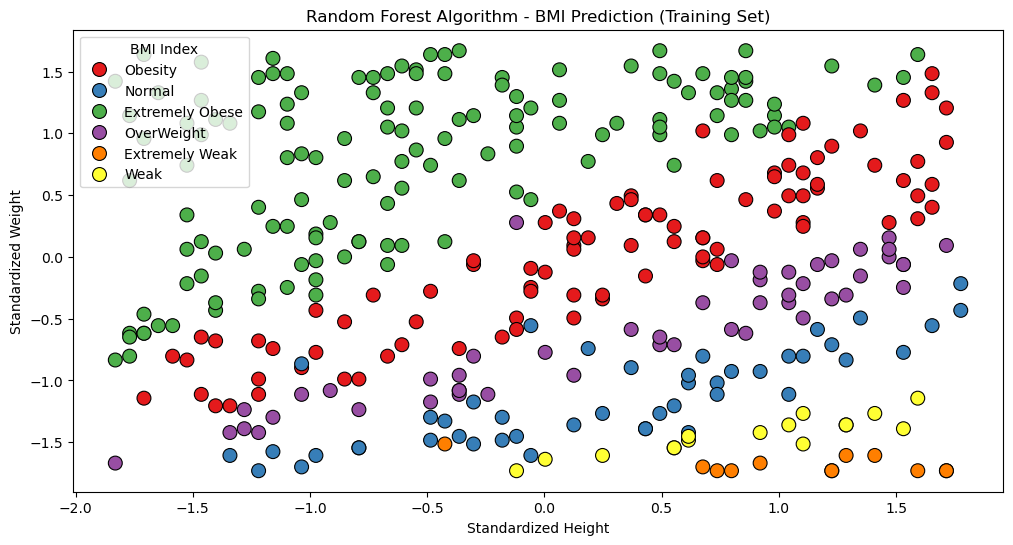

In [177]:
plt.figure(figsize=(12, 6))
sns.scatterplot(x=X_train.values[:, 0], y=X_train.values[:, 1], hue=y_train, palette='Set1', edgecolor='k', s=100)
plt.title('Random Forest Algorithm - BMI Prediction (Training Set)')
plt.xlabel('Standardized Height')
plt.ylabel('Standardized Weight')
plt.legend(title='BMI Index')
plt.show()

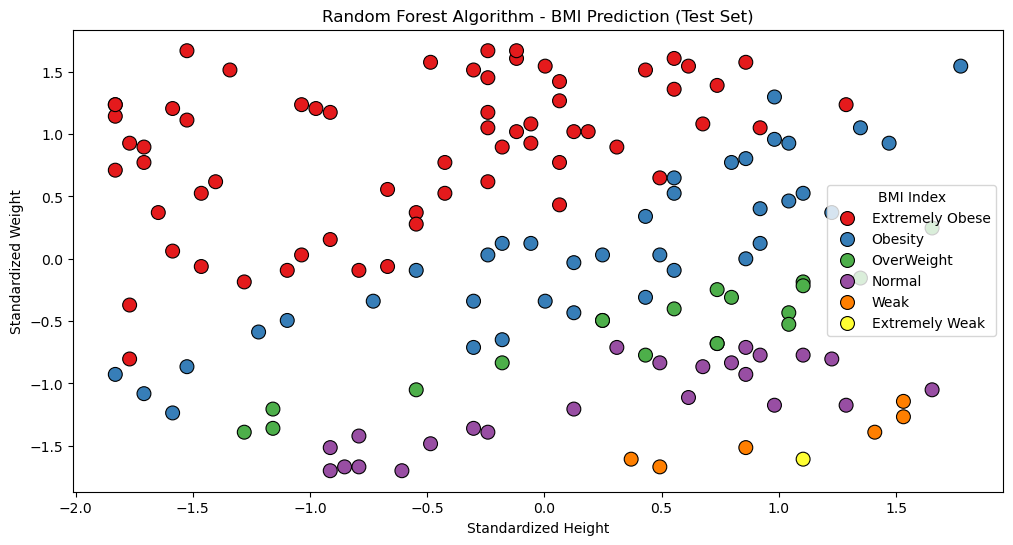

In [178]:
plt.figure(figsize=(12, 6))
sns.scatterplot(x=X_test.values[:, 0], y=X_test.values[:, 1], hue=y_test, palette='Set1', edgecolor='k', s=100)
plt.title('Random Forest Algorithm - BMI Prediction (Test Set)')
plt.xlabel('Standardized Height')
plt.ylabel('Standardized Weight')
plt.legend(title='BMI Index')
plt.show()

In [ ]:
def predict_bmi():
    gender = gender_var.get()
    height = float(height_entry.get())
    weight = float(weight_entry.get())

    details = [gender, height, weight]
    result = lp(details)

    result_label.config(text=f'Predicted BMI Index: {result}')
root = tk.Tk()
root.title("BMI Prediction GUI")


gender_var = tk.StringVar()
gender_label = tk.Label(root, text="Gender:")
gender_label.grid(row=0, column=0, padx=10, pady=10)
gender_dropdown = ttk.Combobox(root, textvariable=gender_var, values=["Male", "Female"])
gender_dropdown.grid(row=0, column=1, padx=10, pady=10)
gender_dropdown.set("Male")


height_label = tk.Label(root, text="Height:")
height_label.grid(row=1, column=0, padx=10, pady=10)
height_entry = tk.Entry(root)
height_entry.grid(row=1, column=1, padx=10, pady=10)
weight_label = tk.Label(root, text="Weight:")
weight_label.grid(row=2, column=0, padx=10, pady=10)
weight_entry = tk.Entry(root)
weight_entry.grid(row=2, column=1, padx=10, pady=10)


predict_button = tk.Button(root, text="Predict BMI", command=predict_bmi)
predict_button.grid(row=3, column=0, columnspan=2, pady=10)


result_label = tk.Label(root, text="")
result_label.grid(row=4, column=0, columnspan=2, pady=10)

root.mainloop()